<a href="https://colab.research.google.com/github/joshuaalpuerto/ML-guide/blob/main/Neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nnfs

# Simple neurons

### One neuron with 3 inputs (from 3 neurons)

In [ ]:
# Imagine this are the output from previous 3 neurons
inputs = [1,2,3]
weights = [0.2,0.8,-0.5]
# only 1 bias becuase we are only looking at one neuron here.
bias = 2

# input[0] * weights[0] + input[1] * weights[1] (or dot product computation)
output = sum([input * weight for input, weight in zip(inputs,weights)]) + bias
print(output)

2.3


### 3 neurons with 4 inputs (from 4 neurons)

In [ ]:
inputs = [1, 2, 3, 2.5]

weights_matrixes = [
      [0.2, 0.8, -0.5, 1.0],
      [0.5, -0.91, 0.26, -0.5],
      [-0.26, -0.27, 0.17, 0.87]
    ]
biases = [2, 3, 0.5]


for weights, bias in zip(weights_matrixes, biases):
  neuron_total = 0
  for input, weight in zip(inputs, weights):
    neuron_total += (input * weight)

  neuron_total += bias
  print(neuron_total)

# List comprehenstion
neuron_totals = [
    sum(input * weight for input, weight in zip(inputs, weights)) + bias
    for weights, bias in zip(weights_matrixes, biases)
]

print(f"List comprehension {neuron_totals}")


4.8
1.21
2.385
List comprehension [4.8, 1.21, 2.385]


### Using numpy to compute dot product

- We don't need loop inside also `sum`
- `np.dot` computation will collapse array so you should put the result structure first.
- Using `np.dot` you should put `weights_matrixes` first because `np.dot` collapse the array into 1D vector because you want the result of 3 neurons (`[n[0] * w[0], n[1] * w[1], [n[2] * w[2]]`

In [ ]:
import numpy as np

inputs = [1, 2, 3, 2.5]

weights_matrixes = [
      [0.2, 0.8, -0.5, 1.0],
      [0.5, -0.91, 0.26, -0.5],
      [-0.26, -0.27, 0.17, 0.87]
    ]
biases = [2, 3, 0.5]

np.dot(weights_matrixes, inputs) + biases

array([4.8  , 1.21 , 2.385])

# Object oriented version

### Matrix dot product for input Batches

- `np.dot` it will compute `Matrix A 1st row` * `Matrix B 1st column` when doing dot product for matrixes
    - We need calculation like this because input batches can be any number (rows) which corresponds to number of column of weights

In [ ]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

# Since weight (3, 4) and  inputs (3, 4) shape is not compatible for np.dot
# It will throw error
# We need to apply transpose
weights_transposed = np.array(weights).T
output = np.dot(inputs, weights_transposed) + biases
print(f"Transposed: {weights_transposed}")
print(f"dot product: {output}")


Transposed: [[ 0.2   0.5  -0.26]
 [ 0.8  -0.91 -0.27]
 [-0.5   0.26  0.17]
 [ 1.   -0.5   0.87]]
dot product: [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


### Imagine you have layer

In [ ]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights_of_layers = [
           # layer 1 shape (3,4)
           [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]],
           # layer 2 (shape (3,3))
           # Why 3? because the layer 1 has 3 neurons
           [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
          ]

biases_of_layers = [
    # layer1
      [2, 3, 0.5],
    # layer2
      [-1, 2, -0.5],
    ]

layer1_output = np.dot(inputs, np.array(weights_of_layers[0]).T) + biases_of_layers[0]
layer2_output = np.dot(layer1_output, np.array(weights_of_layers[1]).T) + biases_of_layers[1]

print(f"Layer 1: {layer1_output}")
print(f"Layer 2: {layer2_output}")

Layer 1: [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
Layer 2: [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


### Object oriented

In [ ]:
import numpy as np
# to random the values
np.random.seed(0)

X = [[1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    # Shape of the weights
    # n_inputs = length of inputs features (not batch!)
    #   We pass n_inputs first so we don't need to Transpose the weights when doing dot_product
    # n_neurons = length of neurons
    # Multiply by 0.10 for scaling values between (-1 to 1)
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    # passing number of neurons we have in this layer
    # [0, 0, 0] assuming we have 3 neurons
    # having shape (n_neurons) vs (1,n_neurons)
    # doesn't make a difference with the result when used in operations
    self.biases = np.zeros(n_neurons)

  def forward(self, inputs):
    # Remember we don't need to Transpose because we already did that on initialization
    # Return computation for each input batch
    self.output = np.dot(inputs, self.weights) + self.biases

# We will initialize a new layer
# 4 - number of features of the input
# 5 - number of neurons
layer1 = Layer_Dense(4, 5)
# the number of inputs will be 5 because layer1 output is 5 features (from 1 for each neurons)
# Why input should be the same shape as output of the previous layer?
# Because we will get shape mismatch error (computing the their value should be on the same shape)
# length inputs features === length weights(neurons)
# W
layer2 = Layer_Dense(5, 2)

layer1.forward(X)
layer2.forward(layer1.output)

# Layer 1 shape = (3,5) where 3 is batch and 5 is the neurons (features)
# You can see how the previous 4 features/inputs changes to 5.
print(f"layer1 : {layer1.output}")
print(f"layer2 : {layer2.output}")

layer1 : [[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
layer2 : [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


# Using Torch

In [ ]:
import torch

class LinearRegressionModel(torch.nn.Module):
    def __init__(self, features):
      super().__init__()
      # this is the same as above layer1 = Layer_Dense(4, 5)
      self.linear_layer = torch.nn.Linear(in_features=features, out_features=3)

    def forward(self, x):
      # passing x directly will do the linear formula (same as above)
      y_pred = self.linear_layer(x)
      return y_pred

class WithSequentialLinearRegressionModel(torch.nn.Module):
    def __init__(self, features):
      super().__init__()
      # this is the same as above layer1 = Layer_Dense(4, 5)
      self.linear_layers = torch.nn.Sequential(
          torch.nn.Linear(in_features=features, out_features=3),
          torch.nn.Linear(in_features=3, out_features=1)
      )

    def forward(self, x):
      # passing x directly will do the linear formula (same as above)
      y_pred = self.linear_layers(x)
      return y_pred

In [ ]:
X = torch.randn(10, 2)
X

tensor([[-0.2678,  0.6489],
        [-0.0651,  0.6004],
        [-1.2378, -0.2934],
        [-0.6673, -0.8304],
        [-0.6086,  0.8100],
        [ 0.8250,  0.5475],
        [ 1.7509, -0.1318],
        [-0.0947,  0.9533],
        [ 0.5965,  1.6283],
        [ 0.1613,  0.5194]])

In [ ]:
linearmodel = LinearRegressionModel(features=2)
print('old', linearmodel.state_dict())

preds = linearmodel(X)
print('new', preds)

old OrderedDict([('linear_layer.weight', tensor([[-0.1444,  0.2258],
        [ 0.4411, -0.2543],
        [-0.6777, -0.1965]])), ('linear_layer.bias', tensor([ 0.3574, -0.2321, -0.3589]))])
new tensor([[ 0.5425, -0.5152, -0.3049],
        [ 0.5023, -0.4135, -0.4327],
        [ 0.4699, -0.7035,  0.5376],
        [ 0.2663, -0.3154,  0.2566],
        [ 0.6281, -0.7065, -0.1055],
        [ 0.3618, -0.0074, -1.0256],
        [ 0.0747,  0.5737, -1.5196],
        [ 0.5863, -0.5163, -0.4820],
        [ 0.6388, -0.3830, -1.0831],
        [ 0.4513, -0.2931, -0.5702]], grad_fn=<AddmmBackward0>)


# Activitaion ReLU

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

X, y = spiral_data(100, 3)

# Class Layer_Dense is on top

class Activation_Relu:
    def forward(self, inputs):
      self.output = np.maximum(0, inputs)

# X has shape of 2
layer1 = Layer_Dense(2, 5)
activation1 = Activation_Relu()


layer1.forward(X)
activation1.forward(layer1.output)

print(f"layer1 output: {layer1.output}")
print(f"activation output: {activation1.output}")


(300, 5)

# Softmax

In [ ]:
import math

layer_outputs = [4.8, 1.21, 2.385]

# this will get rid of negative values (according to softmax formula)
E = math.e # 2.71828182846

exp_values = [E ** output for output in layer_outputs]

norm_base = sum(exp_values)
norm_values = [exp_value / norm_base for exp_value in exp_values]

# should be == 1
sum_norm_values = sum(norm_values)

print(f"Exponent values: {exp_values}")
print(f"Normalize values: {norm_values}")
print(f"Sum normalize values: {sum_norm_values}")

Exponent values: [121.51041751873483, 3.353484652549023, 10.859062664920513]
Normalize values: [0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
Sum normalize values: 0.9999999999999999


### With NP

No need for looping

In [ ]:
import math
import numpy as np

layer_outputs = [4.8, 1.21, 2.385]

# Apply exp to all values
exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values)


sum_norm_values = sum(norm_values)

print(f"Exponent values: {exp_values}")
print(f"Normalize values: {norm_values}")
print(f"Sum normalize values: {sum_norm_values}")

Exponent values: [121.51041752   3.35348465  10.85906266]
Normalize values: [0.89528266 0.02470831 0.08000903]
Sum normalize values: 0.9999999999999999


### Dealing with batch of input

In [ ]:
import numpy as np

layer_output_batch = [[4.8, 1.21, 2.385],
                      [8.9, -1.81, 0.2],
                      [1.41, 1.051, 0.026]]

# It will apply exponential function to all matrixes
exp_values = np.exp(layer_output_batch)

# Axis=1 - because want to compute each row/batch e.g sum([4.8, 1.21, 2.385])
# Keepdims=True - because we want to keep it's structure ([[sum],[sum], [sum]]),
# this way we can divide it easily with matrix of exp_values
sum_per_batch = np.sum(exp_values, axis=1, keepdims=True)

norm_values_per_batch = exp_values / sum_per_batch
# after all is done each row of matrixes should be == 1
sum_normalize_per_batch = np.sum(norm_values_per_batch, axis=1, keepdims=True)

print(f"Normalize values: {norm_values_per_batch}")
print(f"Sum normalize values: {sum_normalize_per_batch}")

Normalize values: [[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]
Sum normalize values: [[1.]
 [1.]
 [1.]]


### Applying to dense layer

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

# Class Layer_Dense is initialized on top
# Class Activiation_Relu is initialized on top

class Activation_Softmax:
    """
      Remember inputs here is the output of the model with shape(batch, n_neurons)
      Check Layer1.output or Activation1.output
    """
    def forward(self, inputs):
      # To prevent overflow prevention
      # where exponent can overflow easily with large number
      # Mathematically we subtract the largest number to every number per batch.
      # Then going to softmax it will still result to the same probability result
      max_value_per_batch = np.max(inputs, axis=1, keepdims=True)
      exp_values = np.exp(inputs - max_value_per_batch)

      # Get the sum per batch
      sum_per_batch = np.sum(exp_values, axis=1, keepdims=True)

      probabilities = exp_values / sum_per_batch

      self.output = probabilities


X,y = spiral_data(samples=100, classes=3)

# 2nd layer
# X has shape of 2 (X.shape)
dense_layer1 = Layer_Dense(2, 3)
step_fn = Activation_Relu()

# Output layer
# 3 - input to the 1st layer
# 3 - because we have 3 classes
output_layer = Layer_Dense(3, 3)
softmax_fn = Activation_Softmax()

# Forward pass
dense_layer1.forward(X)
step_fn.forward(dense_layer1.output)

# output
output_layer.forward(step_fn.output)
softmax_fn.forward(output_layer.output)


print(f"Softmax output shape: {softmax_fn.output.shape}")
print(f"Softmax/final output (1st 5): {softmax_fn.output[:5]}")

Softmax output shape: (300, 3)
Softmax/final output (1st 5): [[0.33333333 0.33333333 0.33333333]
 [0.33334931 0.33330798 0.33334271]
 [0.33337851 0.33327296 0.33334853]
 [0.33335058 0.3332871  0.33336232]
 [0.33336076 0.33326703 0.33337221]]


# Loss function

- linear regression (Mean square error)
- Classification (Categorical cross-entropy)
- Identify how wrong the prediction was

### Log
- To solve X in

```python
  e ** X = b
```

- E = Euler's number `2.71828182846` or base of natural log (`ln`)
- B = some numbers defined

In [ ]:
import numpy as np

b = 5.2

log = np.log(b)

print(f"log = {log}")
print (f"Verify {math.e ** log} == {b}")

log = 1.6486586255873816
Verify 5.199999999999999 == 5.2


### Computing loss with Categorical Cross-Entropy

- The lower probability/confidence the higher loss value is

In [ ]:
import math

def compute_loss(softmax_output, target_ouput):
  loss = -(math.log(softmax_output[0]) * target_ouput[0] +
           math.log(softmax_output[1]) * target_ouput[1] +
           math.log(softmax_output[2]) * target_ouput[2])
  return loss


low_loss_softmax_output = [0.7, 0.1, 0.2]
# confidence level is low
high_loss_softmax_output = [0.5, 0.1, 0.2]
# one hot encoding here we manually set it this
# but in realword it is the argmax of the softmax output.
pred_one_hot_enc_ouput = [1, 0, 0]

low_loss_value = compute_loss(low_loss_softmax_output, pred_one_hot_enc_ouput)
high_loss_value = compute_loss(high_loss_softmax_output, pred_one_hot_enc_ouput)

print(f"High confidence loss value: {low_loss_value}")
print(f"Low confidence loss value: {high_loss_value}")


High confidence loss value: 0.35667494393873245
Low confidence loss value: 0.6931471805599453


In [ ]:
import numpy as np

low_loss_softmax_output = [0.7, 0.1, 0.2]
high_loss_softmax_output = [0.5, 0.1, 0.2]

# Simplifying the calculation above
# we can get the argmax confidence and do -math.log
# that's why Categorical Cross-Entropy is also called as -log
low_loss_value = -np.log(0.7) # assuming that target_class = 0
high_loss_value = -np.log(0.5) # assuming that target_class = 0
high_loss_wrong_predictiion = -np.log(0.1) # assuming that target_class = 0 but predicted class 1

print(f"High confidence loss value: {low_loss_value}")
print(f"Low confidence loss value: {high_loss_value}")
print(f"Incorrect class loss value: {high_loss_wrong_predictiion}")

High confidence loss value: 0.35667494393873245
Low confidence loss value: 0.6931471805599453
Incorrect class loss value: 2.3025850929940455


### Computing overall loss for all inputs batches

Batch of 5 and 3
```
[[0.33333333 0.33333333 0.33333333]
 [0.33334931 0.33330798 0.33334271]
 [0.33337851 0.33327296 0.33334853]
 [0.33335058 0.3332871  0.33336232]
 [0.33336076 0.33326703 0.33337221]]
```



In [ ]:
# Remember here we won't have negative number as this is probability distribution
# Also here our examples assumed that our model predicted each batch correctly.
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
# target classes (ground truth)
class_targets = [0, 1, 1]

# return the probabilities for each batch base on target class
prediction_probabilities = softmax_outputs[range(len(softmax_outputs)), class_targets]

# compute the neg_log (for each batch)
batch_loss_value = -np.log(prediction_probabilities)

# get the average_loss as overall loss
average_loss = np.mean(batch_loss_value)

print(f"loss: {average_loss}")

loss: 0.38506088005216804


### Fixing issue when probability is 0

The above `loss` computation is good but it has a problem if value is `0`

In [ ]:
# We can clip the value to lowest possible number without removing it's meaning.
# for any value of 0 it will be  transform between 0.0000001 - 0.9999999
softmax_outputs = np.array([[0.0, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

clipped_softmax_output = np.clip(softmax_outputs, 1e-7, 1-1e-7)

print(f"Clipped softmax: {clipped_softmax_output}")

Clipped softmax: [[1.e-07 1.e-01 2.e-01]
 [1.e-01 5.e-01 4.e-01]
 [2.e-02 9.e-01 8.e-02]]


### Implementing Loss

NOTE: `Loss_CategoricalCrossEntropy.forward` if `y_target` = `[[1, 0], [0, 1], [0, 1], [1, 0]]` one hot encoding, then we have to multiply it against the `y_pred` to get the argmax for each probabilities.
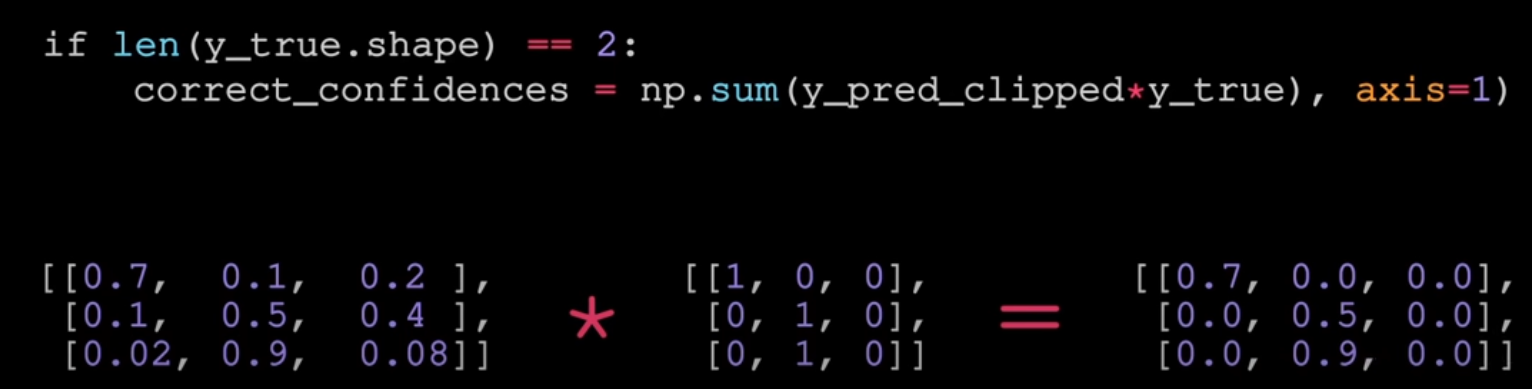

In [ ]:
# Class Layer_Dense is initialized on top
# Class Activiation_Relu is initialized on top
# Class Activiation_Softmax is initialized on top

class Loss:
  """
    Any loss implementation will have calculate function
  """
  def calculate(self, output, y):
    # Forward the computation of loss for each batch
    sample_losses = self.forward(output, y)
    # Average to server as overall loss
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossEntropy(Loss):
  """
    NOTE: That you have to make sure len(y_pred) === len(y_target)

    y_pred = softmax outputs in batch
    y_target = should can either be:
      [0, 1, 2] - Scalar value of classes
      [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]] - Or 2D vector with one-hot encoding

    NOTE: I prefer passing scalar value, also length here means the length of the batch
  """
  def forward(self, y_pred, y_target):
    samples_len = len(y_pred)
    ## Apply the clipping to prevent issue with np.log and np.mean
    clipped_y_pred = np.clip(y_pred, 1e-7, 1-1e-7)

    # If Scalar shape (1, )
    if (len(y_target.shape) == 1):
      prediction_probabilities = clipped_y_pred[range(samples_len), y_target]

    elif (len(y_target.shape) == 2):
      # Since we y_target is one hot encoding we can eliminate other numbers.
      raw_product = y_pred * y_target

      # sum will only get the value of the target probabilitity
      prediction_probabilities = np.sum(raw_product, axis=1)

    negative_log_likelihood = -np.log(prediction_probabilities)

    return negative_log_likelihood

In [ ]:
X,y = spiral_data(samples=100, classes=3)

# 2nd layer
# X has shape of 2 (X.shape)
dense_layer1 = Layer_Dense(2, 3)
step_fn = Activation_Relu()

# Output layer
# 3 - input to the 1st layer
# 3 - because we have 3 classes
output_layer = Layer_Dense(3, 3)
softmax_fn = Activation_Softmax()

# Forward pass
dense_layer1.forward(X)
step_fn.forward(dense_layer1.output)

# output
output_layer.forward(step_fn.output)
softmax_fn.forward(output_layer.output)

# compute loss function
loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_fn.output, y)

print(f"Loss: {loss}")

Loss: 1.0981589433669239


# Optimization

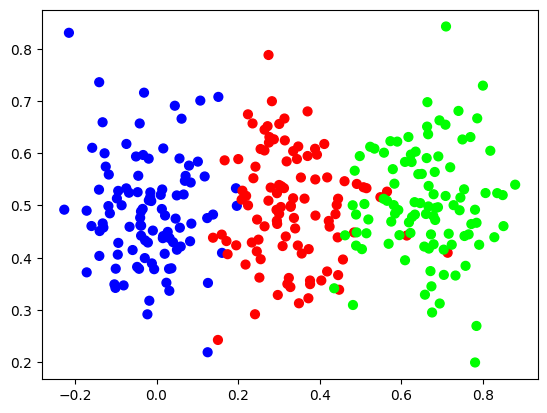

In [ ]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

X,y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap= 'brg')
plt.show()

## Gradien descent Algorithm
- is an algorithm used to minimize the loss function. It uses derivatives(computed by backpropagation) to identify how much the model parameter should change in respect to the loss (how can we reduce the loss value)

**Real work interpretation for derivatives (how change should be computed in respect to a variable)**


---


**Real-World Example: Temperature and Altitude**
- Imagine you're measuring the temperature as a function of altitude while climbing a mountain. But altitude itself changes as a function of time, because you're hiking at a certain speed. Here's how the chain rule applies:
    1. **Temperature depends on altitude**: Let’s say the temperature `T` changes with altitude `h`. This gives us `dT / dh`, which tells us how fast the temperature changes as we go higher.
    2. **Altitude depends on time**: Now, your altitude is changing over time, say as a result of your hiking speed. This is `dh /dt`, the rate at which you're gaining altitude per unit time.
    3. **Temperature changes over time**: The chain rule tells us that to find how temperature changes over time `dT / dt`, we can multiply the two rates: `dTdt=dT/dh × dh/dt`
        - This means the rate at which temperature changes as you hike depends both on how fast the temperature changes with altitude and how quickly you're gaining altitude.z
- Question: you need to get the temperature of when you reach 10K ft attitude?
    - `Base temperature` + (`d (derivatives/change of temperature per feet)` * `10K`)

In [ ]:
import numpy as np

x = np.random.randn(10, 1)
y = 2 * x + np.random.randn(10, 1)

print(x)

# Parameters
w = 0.0
b = 0.0
learning_rate = 0.01

def descend(x, y, w, b, learning_rate):
  dldw = 0.0
  dldb = 0.0

  N = x.shape[0]

  for xi, yi in zip(x, y):
    # partial derivative in respect to weights (slope)
    dldw += -2 * xi * (yi - (w * xi + b))
    # partial derivative in respect to bias (intercept)
    dldb += -2 * (yi - (w * xi + b))

  w = w - learning_rate * (1/N) * dldw
  b = b - learning_rate * (1/N) * dldb

  return w, b


for epoch in range(400):
  w, b = descend(x, y, w, b, learning_rate)
  y_pred = w * x + b
  loss = np.mean(np.square(y - y_pred))

  print(f"Epoch: {epoch}, Loss: {loss}, w: {w}, b: {b}")

[[-0.24647467]
 [-0.55115288]
 [-1.37803146]
 [-1.66218514]
 [-1.39693776]
 [-1.572416  ]
 [ 0.32974343]
 [-0.04429895]
 [-0.47396877]
 [-0.74756288]]
Epoch: 0, Loss: 6.07378352391782, w: [0.0487119], b: [-0.03976405]
Epoch: 1, Loss: 5.712559528658564, w: [0.0958002], b: [-0.07797845]
Epoch: 2, Loss: 5.376570351626546, w: [0.14132248], b: [-0.11469932]
Epoch: 3, Loss: 5.064041666596042, w: [0.18533427], b: [-0.14998078]
Epoch: 4, Loss: 4.773324016516559, w: [0.22788912], b: [-0.18387503]
Epoch: 5, Loss: 4.502884024694204, w: [0.26903865], b: [-0.21643236]
Epoch: 6, Loss: 4.251296224577601, w: [0.30883263], b: [-0.24770128]
Epoch: 7, Loss: 4.0172354646075625, w: [0.34731908], b: [-0.27772855]
Epoch: 8, Loss: 3.7994698476542914, w: [0.38454426], b: [-0.30655925]
Epoch: 9, Loss: 3.5968541674148824, w: [0.4205528], b: [-0.33423685]
Epoch: 10, Loss: 3.4083238067922985, w: [0.45538773], b: [-0.36080325]
Epoch: 11, Loss: 3.232889065738975, w: [0.48909054], b: [-0.38629884]
Epoch: 12, Loss: 3.

# Simple Seq2Seq

Let’s implement a Seq2Seq model for a character-level language translation task (e.g., English to French). (From this [blog](https://medium.com/@evertongomede/understanding-sequence-to-sequence-seq2seq-models-and-their-significance-d2f0fd5f6f7fhttps://)

In [ ]:
source_sentences = ["hello", "goodbye", "thanks", "yes", "no"]
target_sentences = ["bonjour", "au revoir", "merci", "oui", "non"]

source_chars = set("".join(source_sentences))
target_chars = list(set("".join(target_sentences)))

print(source_chars)

{'l', 'd', 't', 'e', 'o', 's', 'h', 'b', 'n', 'g', 'y', 'k', 'a'}


In [ ]:
import numpy as np

# Data Preparation
source_sentences = ["hello", "goodbye", "thanks", "yes", "no"]
target_sentences = ["bonjour", "au revoir", "merci", "oui", "non"]

source_chars = list(set("".join(source_sentences)))
target_chars = list(set("".join(target_sentences)))

source_char_to_idx = {char: idx for idx, char in enumerate(source_chars)}
target_char_to_idx = {char: idx for idx, char in enumerate(target_chars)}

num_source_chars = len(source_chars)
num_target_chars = len(target_chars)

# Hyperparameters
hidden_size = 128
learning_rate = 0.01
epochs = 1000

# Initialize weights and biases
encoder_weights = np.random.randn(num_source_chars, hidden_size)
decoder_weights = np.random.randn(hidden_size, num_target_chars)
encoder_bias = np.zeros(hidden_size)
decoder_bias = np.zeros(num_target_chars)

# Training
for epoch in range(epochs):
    total_loss = 0

    for source_sentence, target_sentence in zip(source_sentences, target_sentences):
        source_encoded = np.zeros((len(source_sentence), hidden_size))
        for t, char in enumerate(source_sentence):
            source_encoded[t] = np.dot(encoder_weights[source_char_to_idx[char]], encoder_bias)

        decoder_hidden_state = source_encoded[-1]
        loss = 0

        for t, char in enumerate(target_sentence):
            decoder_output = np.dot(decoder_hidden_state, decoder_weights) + decoder_bias
            predicted_char_idx = np.argmax(decoder_output)

            if predicted_char_idx == target_char_to_idx[char]:
                loss -= np.log(decoder_output[predicted_char_idx])
            else:
                loss -= np.log(1e-20)  # To avoid log(0)

            # Update decoder hidden state
            decoder_hidden_state = np.dot(decoder_output, decoder_weights.T)

        total_loss += loss

    # Backpropagation (Gradient Descent)
    encoder_weights_grad = np.zeros_like(encoder_weights)
    decoder_weights_grad = np.zeros_like(decoder_weights)
    encoder_bias_grad = np.zeros_like(encoder_bias)
    decoder_bias_grad = np.zeros_like(decoder_bias)

    for source_sentence, target_sentence in zip(source_sentences, target_sentences):
        # ... Similar to forward pass

        # Backpropagation through time
        for t in reversed(range(len(target_sentence))):
            target_char = target_sentence[t]
            target_char_idx = target_char_to_idx[target_char]

            target_one_hot = np.zeros(num_target_chars)
            target_one_hot[target_char_idx] = 1

            # ... Similar to backward pass

            # Update gradients
            decoder_weights_grad += np.outer(decoder_hidden_state, decoder_output - target_one_hot)
            decoder_bias_grad += decoder_output - target_one_hot
            decoder_hidden_state = np.dot(decoder_output, decoder_weights.T)
            # ... Similar updates for encoder

    # Update weights and biases
    encoder_weights -= learning_rate * encoder_weights_grad
    decoder_weights -= learning_rate * decoder_weights_grad
    encoder_bias -= learning_rate * encoder_bias_grad
    decoder_bias -= learning_rate * decoder_bias_grad

    average_loss = total_loss / len(source_sentences)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {average_loss:.4f}")

<ipython-input-1-5cfd0ac084ba>:44: RuntimeWarning: divide by zero encountered in log
  loss -= np.log(decoder_output[predicted_char_idx])


Epoch 1/1000, Loss: inf
Epoch 2/1000, Loss: 229.5954
Epoch 3/1000, Loss: 220.8084
Epoch 4/1000, Loss: 111.6339
Epoch 5/1000, Loss: nan
Epoch 6/1000, Loss: nan
Epoch 7/1000, Loss: nan
Epoch 8/1000, Loss: nan
Epoch 9/1000, Loss: nan
Epoch 10/1000, Loss: nan
Epoch 11/1000, Loss: nan
Epoch 12/1000, Loss: nan
Epoch 13/1000, Loss: nan
Epoch 14/1000, Loss: nan
Epoch 15/1000, Loss: nan
Epoch 16/1000, Loss: nan
Epoch 17/1000, Loss: nan
Epoch 18/1000, Loss: nan
Epoch 19/1000, Loss: nan
Epoch 20/1000, Loss: nan
Epoch 21/1000, Loss: nan
Epoch 22/1000, Loss: nan
Epoch 23/1000, Loss: nan
Epoch 24/1000, Loss: nan
Epoch 25/1000, Loss: nan
Epoch 26/1000, Loss: nan
Epoch 27/1000, Loss: nan
Epoch 28/1000, Loss: nan
Epoch 29/1000, Loss: nan
Epoch 30/1000, Loss: nan
Epoch 31/1000, Loss: nan
Epoch 32/1000, Loss: nan
Epoch 33/1000, Loss: nan
Epoch 34/1000, Loss: nan
Epoch 35/1000, Loss: nan
Epoch 36/1000, Loss: nan
Epoch 37/1000, Loss: nan
Epoch 38/1000, Loss: nan
Epoch 39/1000, Loss: nan
Epoch 40/1000, Loss

# Using PyTorch